### Name : Mohamed Ahmed Mohamed Ibrahim

## Regression

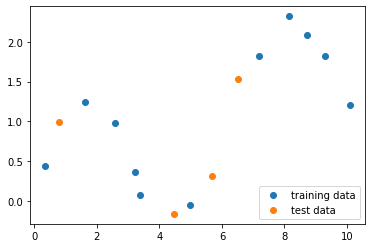

In [135]:
%matplotlib notebook
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10

splits = train_test_split(x, y, random_state=0)
for split in splits: split.shape = (-1, 1)
X_train, X_test, y_train, y_test = splits

plt.figure()
plt.scatter(X_train, y_train, label='training data')
plt.scatter(X_test, y_test, label='test data')
plt.legend(loc=4);

### Question 1.1
Write a function that fits a polynomial LinearRegression model on the training data X_train for degrees 1, 3, 6, and 9. (Use PolynomialFeatures in sklearn.preprocessing to create the polynomial features and then fit a linear regression model) For each model, find 100 predicted values over the interval x = 0 to 10 (e.g. np.linspace(0,10,100)) and store this in a numpy array. The first row of this array should correspond to the output from the model trained on degree 1, the second row degree 3, the third row degree 6, and the fourth row degree 9.

In [136]:

print(X_train.shape)

def answer_one():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    
    poly_degrees, degree_predictions = [1, 3, 6, 9], []
    for deg in poly_degrees:
        poly_features = PolynomialFeatures(degree=deg).fit_transform(X_train)
        poly_test = PolynomialFeatures(degree=deg).fit_transform(np.linspace(0, 10, 100).reshape(-1, 1))
        model = LinearRegression().fit(poly_features, y_train)
        degree_predictions.append(model.predict(poly_test))
    return degree_predictions

(11, 1)


### Fitted model plot

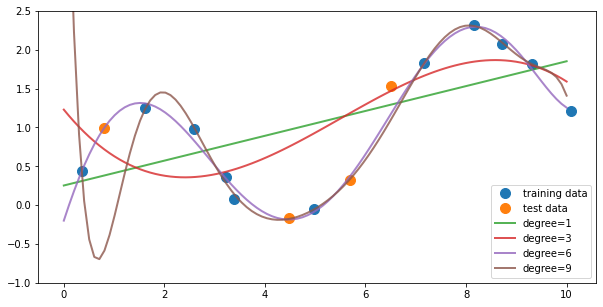

In [137]:
def plot_one(degree_predictions):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)

plot_one(answer_one())

### Question 1.2
Comment on the figure above:

**✅ It seems that the model can learn more complex shapes with high degree of polynomical features.**

### Quick note on $R^2$-score:
Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a $R^2$-score of 0.0.

### Question 2
Write a function that fits a polynomial LinearRegression model on the training data `X_train` for degrees 0 through 9. For each model compute the $R^2$ regression score on the training data as well as the the test data, and return both of these arrays in a tuple.

*This function should return one tuple of numpy arrays `(r2_train, r2_test)`. Both arrays should have shape `(10,)`*

In [138]:
def answer_two():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.metrics import r2_score

    poly_degrees, r2_scores = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], []
    for deg in poly_degrees:
        poly_features = PolynomialFeatures(degree=deg).fit_transform(X_train)
        model = LinearRegression().fit(poly_features, y_train)
        y_predicted = model.predict(poly_features)
        r2_scores.append(r2_score(y_train, y_predicted))
    return r2_scores
answer_two()

[0.0,
 0.4292457781234663,
 0.45109980444082465,
 0.5871995368779845,
 0.9194194471769344,
 0.9757864143068234,
 0.9901823324795082,
 0.9935250927840363,
 0.9963754538776504,
 0.9980370625665307]

### Question 3
Plot $R^2$ scores at degrees from 0 to 9.

Based on the $R^2$ scores (degree levels 0 through 9), what degree level corresponds to a model that is underfitting? What degree level corresponds to a model that is overfitting? What choice of degree level would provide a model with good generalization performance on this dataset? 

✅ **The model with the lowest polynomial degree (0) it the one that corresponds to underfitting and highest polynomial degree (9) is the one of overfitting.**

✅ **I think degree 4 will be good as it gets a good score in r2 but not overfitting the training data.**


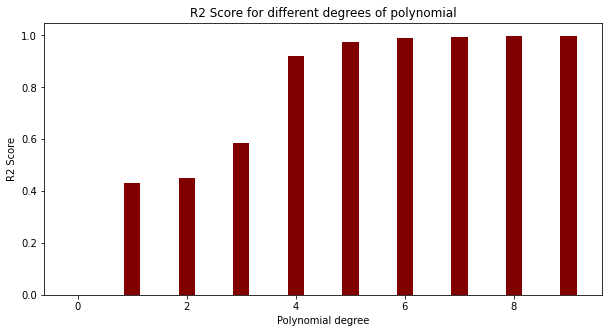

In [139]:
import numpy as np
import matplotlib.pyplot as plt

r2_scores = answer_two()
poly_degs = np.arange(0, 10, 1)
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(poly_degs, r2_scores, color ='maroon', width = 0.3)
 
plt.xlabel("Polynomial degree")
plt.ylabel("R2 Score")
plt.title("R2 Score for different degrees of polynomial")
plt.show()

### Question 4

Training models on high degree polynomial features can result in overly complex models that overfit, so we often use regularized versions of the model to constrain model complexity, as we saw with Ridge and Lasso linear regression.

For this question, train two models: a non-regularized LinearRegression model (default parameters) and a regularized Lasso Regression model (with parameters `alpha=0.01`, `max_iter=10000`) both on polynomial features of degree 12. Return the $R^2$ score for both the LinearRegression and Lasso model's test sets.

*This function should return one tuple `(LinearRegression_R2_test_score, Lasso_R2_test_score)`*

**Comment on the results**

In [140]:
def answer_four():
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import Lasso, LinearRegression
    from sklearn.metrics import r2_score
    r2_scores = []
    models = [LinearRegression(), Lasso(alpha=0.01, max_iter=10000)]
    for model in models:
        poly_features = PolynomialFeatures(degree=12).fit_transform(X_train)
        model.fit(poly_features, y_train)
        y_predicted = model.predict(poly_features)
        r2_scores.append(r2_score(y_train, y_predicted))
    LinearRegression_R2_test_score, Lasso_R2_test_score = r2_scores[0], r2_scores[1]
    return LinearRegression_R2_test_score, Lasso_R2_test_score 
answer_four()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.556e-01, tolerance: 6.895e-04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


(0.9999999999984703, 0.9469191371258496)

### Question 5
Calculate total mean square error.
$$
MSE = E[ (ytrue  - yhat)^2 ] 
$$

Then compare your results with scikit-learn implementation of mean square error.

In [141]:
def mse(y_true, y_pred):
    if(not isinstance(y_true, np.ndarray)): y_true = np.array(y_true)
    if(not isinstance(y_pred, np.ndarray)): y_pred = np.array(y_pred)

    error = np.mean(np.power(y_true - y_pred, 2))
    return error

from sklearn.metrics import mean_squared_error
print(mean_squared_error([1,2,3,4,5,6,7],[1,2,4,6,8,10,14]))
print(mse([1,2,3,4,5,6,7],[1,2,4,6,8,10,14]))

11.285714285714286
11.285714285714286


### Question 6
Implement a linear regression class that can be used by one of the following three optoins (according to user's choice):
1. Ordinary Linear Regression Class 
2. Implement Ridge Regression Class
3. Implement Lasso Regression Class

In [142]:
from sklearn.linear_model import Lasso, LinearRegression, ridge_regression

class CustomLinearRegression:
    def __init__(self, *args, imp = "ORDINARY", **kwargs):
        if imp == "ORDINARY": self.model = LinearRegression(*args, **kwargs)
        elif imp == "LASSO": self.model = Lasso(*args, **kwargs)
        elif imp == "RIDGE": self.model = ridge_regression(*args, **kwargs)
        else: raise TypeError(f'Un supported model type expexted one of ["ORDINARY", "LASSO", "RIDGE"] but get "{imp}"')
    
    def get(self):
        return self.model

ord_model = CustomLinearRegression().get()
lasso_model = CustomLinearRegression(imp = "LASSO", alpha=0.01, max_iter=10000).get()

#ridge_model = CustomLinearRegression(imp="LASSO ").get() Error is thrown (extra space in LASSO)


### Part 2
Run the following cells to download fmnist dataset which will be used for the rest of the assignment.

In [143]:
!pip install openml

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openml as oml
from matplotlib import cm


In [144]:
# Download FMINST data. Takes a while the first time.
fmnist = oml.datasets.get_dataset(40996)
X, y, _, _ = fmnist.get_data(target=fmnist.default_target_attribute); 
fmnist_classes = {0:"T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 
                  6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

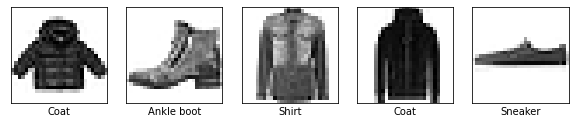

In [145]:
# Take some random examples, reshape to a 32x32 image and plot
from random import randint
fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
for i in range(5):
    n = randint(0,70000)
    axes[i].imshow(X.values[n].reshape(28, 28), cmap=plt.cm.gray_r)
    axes[i].set_xlabel((fmnist_classes[int(y.values[n])]))
    axes[i].set_xticks(()), axes[i].set_yticks(())
plt.show();

### Question 7
First, we'll try the default Logistic Regression and k-Nearest Neighbors as a point of reference. To see whether our models are overfitting, we also evaluate the training set error. This can be done using cross_validation.

Implement the following `evaluate_learners` function which evaluates each classifier passed into it on the given data, and then returns both the train and test scores of each as a list. You must use `cross_validate` function.

In [146]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Take a 10% stratified subsample to speed up experimentation
Xs, _, ys, _ = train_test_split(X,y, stratify=y, train_size=0.1)

In [147]:
import warnings
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import ConvergenceWarning
def evaluate_learners(classifiers, X, y):
    """ Evaluate each classifier in 'classifiers' with cross-validation on the provided (X, y) data. 
    
    Given a list of scikit-learn classifiers [Classifier1, Classifier2, ..., ClassifierN] return two lists:
     - a list with the scores obtained on the training samples for each classifier,
     - a list with the test scores obtained on the test samples for each classifier.
     The order of scores should match the order in which the classifiers were originally provided. E.g.:     
     [Classifier1 train score, ..., ClassifierN train score], [Classifier1 test score, ..., ClassifierN test score]
    """
    splits = train_test_split(X, y, train_size=0.8)
    X_training, X_testing, y_training, y_testing = splits
    X_training = StandardScaler().fit_transform(X_training)
    X_testing = StandardScaler().fit_transform(X_testing)

    train_scores, test_scores = [], []
    for classifier in classifiers:
        train_scores.append(cross_validate(classifier, X_training, y_training, error_score='raise')['test_score'])
        test_scores.append(cross_validate(classifier, X_testing, y_testing)['test_score'])
    ########## write your code here ##############
    return train_scores, test_scores 
# # Example output:
# train_scores, test_scores = ([[0.92 , 0.924, 0.916, 0.917, 0.921],  # Classifier 1 train score for each of 5 folds.
#                               [0.963, 0.962, 0.953, 0.912, 0.934],  # Classifier 2 train score for each of 5 folds.
#                              [[0.801, 0.811, 0.806, 0.826, 0.804],  # Classifier 1 test score for each of 5 folds.
#                               [0.766, 0.756, 0.773, 0.756, 0.741],  # Classifier 2 test score for each of 5 folds.


With this small sample of our data we can now train and evaluate the two classifiers.

In [148]:
classifiers = [LogisticRegression(max_iter=500), KNeighborsClassifier()]
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    train_scores, test_scores = evaluate_learners(classifiers, Xs, ys)

Print train scores and test scores.

In [149]:
print(train_scores, test_scores)

[array([0.78303571, 0.81607143, 0.81160714, 0.81696429, 0.79285714]), array([0.79196429, 0.81160714, 0.80714286, 0.80446429, 0.80267857])] [array([0.78214286, 0.79285714, 0.77857143, 0.76428571, 0.80357143]), array([0.725     , 0.76785714, 0.73571429, 0.74642857, 0.775     ])]


### Regularization
We will now tune these algorithm's main regularization hyperparameter: the regularization parameter in logistic regression (alpha), and the number of neighbors (n_neighbors) in kNN. We expect the optimum for n_neighbors between 1 and 50. Alpha should be varied on a log scale (i.e. [0.01, 0.1, 1, 10, 100]) and k should be varied uniformly (i.e. [1,2,3,4]).

### Question 8
In the following cells we vary the regularization parameters in the range given above and, for each classifier, we create a line plot that plots both the training and test score for every value of the regularization hyperparameter. Hence, 2 plots are produced, one for each classifier. We use 5-fold cross validation for all scores, but only plot the means.


In [150]:
from sklearn.model_selection import GridSearchCV

param_c = {'C': np.logspace(-12, 12, num=22)}
param_k = {'n_neighbors': np.geomspace(1, 60, num=12, dtype=int)[1:]}
grids = [param_c, param_k]
grid_searches = [GridSearchCV(clf, grid, n_jobs=-1, cv=3, return_train_score=True).fit(Xs, ys) for clf,grid in zip(classifiers,grids)]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [153]:
# Generic plot for 1D grid search
# grid_search: the result of the GridSearchCV
# param_name: the name of the parameter that is being varied
def plot_tuning(grid_search, param_name, ax):
    ax.plot(grid_search.param_grid[param_name], grid_search.cv_results_['mean_test_score'], marker = '.', label = 'Test score')
    ax.plot(grid_search.param_grid[param_name], grid_search.cv_results_['mean_train_score'], marker = '.', label = 'Train score')
    ax.set_ylabel('score (ACC)')
    ax.set_xlabel(param_name)
    ax.legend()
    ax.set_xscale('log')
    ax.set_title(grid_search.best_estimator_.__class__.__name__)
    bp, bs = grid_search.best_params_[param_name], grid_search.best_score_
    ax.text(bp,bs,"  C:{:.2E}, ACC:{:.4f}".format(bp,bs))

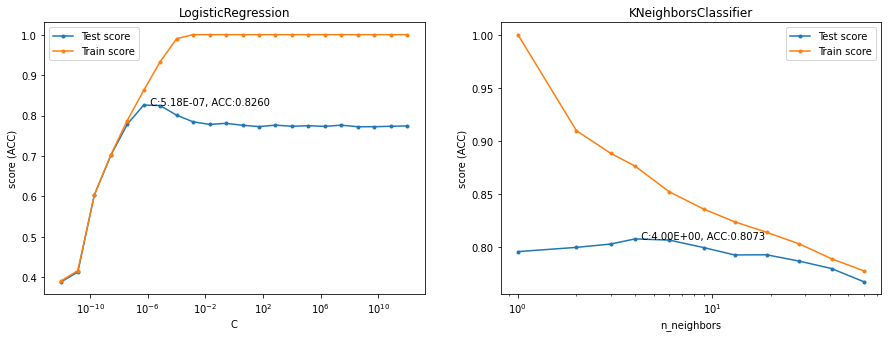

In [155]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
for grid_search, param, ax in zip(grid_searches,['C','n_neighbors'],axes):
    plot_tuning(grid_search, param, ax)

Interpret the plots. When are the methods underfitting? When are they overfitting? How sensitive are they to the regularization hyperparameter?

## Interpreting misclassifications
We train a logistic regression model on the data to look at the confusion matrix

In [156]:
# Create a stratified train-test split on a sample
X_train, X_test, y_train, y_test = train_test_split(Xs,ys, stratify=ys, random_state=0)

In [157]:
# model implementation:
model = LogisticRegression(C=1e-7).fit(X_train,y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### Question 9
A confusion matrix shows the amount of examples in for each pair of true and predicted classes. Interpret the results. Draw the complete confusion matrix for the true and predicted test data.

In [158]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

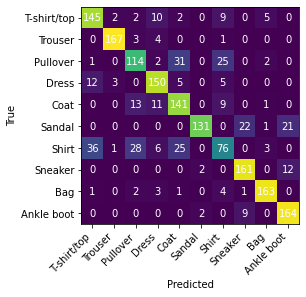

In [159]:
fig, ax = plt.subplots()
im = ax.imshow(cm)
ax.set_xticks(np.arange(10)), ax.set_yticks(np.arange(10))
ax.set_xticklabels(list(fmnist_classes.values()), rotation=45, ha="right")
ax.set_yticklabels(list(fmnist_classes.values()))
ax.set_ylabel('True')
ax.set_xlabel('Predicted')
for i in range(100):
    ax.text(int(i/10),i%10,cm[i%10,int(i/10)], ha="center", va="center", color="w")

## Interpreting model parameters
Finally, we'll take a closer look at the model parameters, i.e. the coefficients of our linear models. Since we are dealing with 28x28 pixel images, we have to learn 784 coefficients. What do these coefficients mean? We'll start by plotting them as 28x28 pixel images.

### Question 10
Train a Logistic Regression model using its tuned hyperparameter from gridsearch used above.
When in doubt, use `C=1e-7` for LogReg.
Pass the trained model to the provided plotting function. Interpret the results in detail. 
Why do you get multiple plots per model? What do the features represent in your data. 
Does it seems like the models pay attention to the right features?
Do you models seem to ignore certain features? Do you observe differences in quality between the different classes?

In [160]:
# Plots the coefficients of the given model as 28x28 heatmaps. 
# The `name` attribute is optional, it is simply a title for the produced figure
def plot_coefficients(model, name=None):
    fig, axes = plt.subplots(1,10,figsize=(20,2))
    fig.suptitle(name if name else model.__class__.__name__)
    for i, ax in enumerate(axes):
        m = ax.imshow(model.coef_[i].reshape(28,28))
        ax.set_xlabel(fmnist_classes[i])
        ax.set_xticks(()), ax.set_yticks(())
    fig.colorbar(m, ax=axes.ravel().tolist())

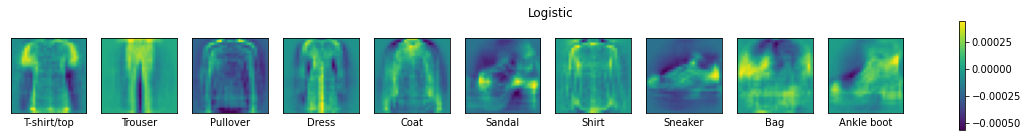

In [161]:
##### Call on the function plot_coefficients using your trained model
plot_coefficients(model, "Logistic")

**Hint** that linear models are typically binary classifiers. They will solve multi-class problems in a one-vs-all approach. Hence, for a 10-class problem, they will build 10 models, each one trained to predict whether an instance is from a specific class or not. This leads to 10 sets of 784 trained coefficients. Above, we plot them as 28x28 matrices, such that each coefficient is plotted at the location of their corresponding pixel value.

**Answer:**

✅ We get multiple plots per model as the logistic regression will fit every class againest the hole classes (shirt vs (all non shirt)) so we get 10 different plots to clasifiy each class againt the other classes

✅ Features represent pexel values

✅ yes it pay attention for important featues for example the long shape of Trouser, 2 arms of T-shirt, ...

✅ May be it ignores the bag arms shape

✅ The bag and ankle boot are not that good as Trouser and T-shirt

### Question 11
Finally, out of curiosity, let's see the result of underfitting and overfitting on the learned coefficients:
Repeat the previous exercise, only with logistic regression. In addition to a tuned version, also add a model that overfits a lot and one that underfits a lot. Interpret and explain the results.

In the cell below replace the ####### with your trained models with different alphas.

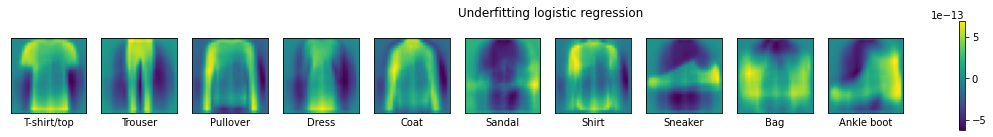

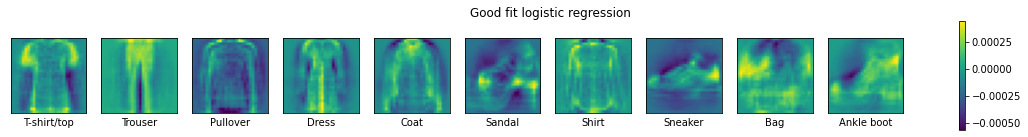

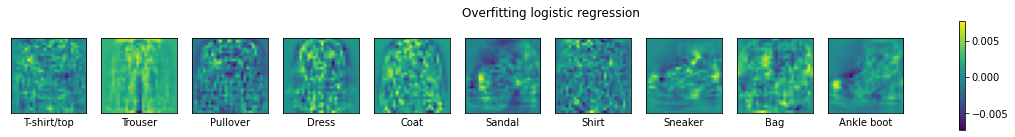

In [164]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    underfit_model = LogisticRegression(C=1e-17).fit(X_train,y_train)
    goodfit_model = LogisticRegression(C=1e-7).fit(X_train,y_train)
    overfit_model = LogisticRegression(C=1e2).fit(X_train,y_train)
    plot_coefficients(underfit_model,"Underfitting logistic regression")
    plot_coefficients(goodfit_model,"Good fit logistic regression")
    plot_coefficients(overfit_model,"Overfitting logistic regression")

**Answer:**
✅ **By changing the hyperparameter C the model cannot learn some categories in a good way like sandal , coat and dress when C was small (casues under fitting). When C was more larger (casues over fitting) the weights learned are some how destroyed in a bad way as the model tries to learn very specific shapes. But when C was in between value the model fits with goog wheights (pexel values) that can generalize well.**